In [7]:
#libraries
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

In [8]:
#loan characteristics
original_balance = 500000
coupon = 0.08
term = 120

#payments
periods = range(1, term+1)
interest_payment = npf.ipmt(
    rate = coupon /12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(
    rate = coupon / 12, per=periods, nper=term, pv=-original_balance)

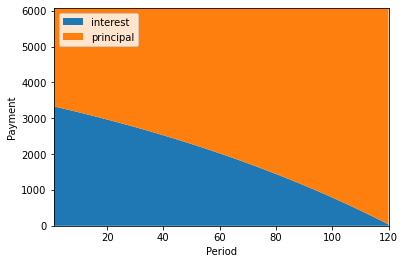

In [9]:
plt.stackplot(periods, interest_payment, principal_payment,
                 labels=["interest","principal"])
plt.legend(loc="upper left")
plt.xlabel("Period")
plt.ylabel("Payment")
plt.margins(0,0)

In [15]:
#pandas float formatting
pd.options.display.float_format = "{:,.2f}".format

#cash flow table
cf_data = {"interest": interest_payment, "principal": principal_payment}
cf_table = pd.DataFrame(data=cf_data,index=periods)
cf_table["Payment"] = cf_table["interest"] + cf_table["principal"]
cf_table["Ending Balance"] = original_balance - \
                cf_table["principal"].cumsum()
cf_table["Beginning Balance"] = [original_balance] + \
                list(cf_table["Ending Balance"])[:-1]
cf_table = cf_table[["Beginning Balance", "Payment", "interest", "principal", "Ending Balance"]]
cf_table.head(10)

,Beginning Balance,Payment,interest,principal,Ending Balance
1,"500,000.00","6,066.38","3,333.33","2,733.05","497,266.95"
2,"497,266.95","6,066.38","3,315.11","2,751.27","494,515.69"
3,"494,515.69","6,066.38","3,296.77","2,769.61","491,746.08"
4,"491,746.08","6,066.38","3,278.31","2,788.07","488,958.01"
5,"488,958.01","6,066.38","3,259.72","2,806.66","486,151.35"
6,"486,151.35","6,066.38","3,241.01","2,825.37","483,325.98"
7,"483,325.98","6,066.38","3,222.17","2,844.21","480,481.77"
8,"480,481.77","6,066.38","3,203.21","2,863.17","477,618.60"
9,"477,618.60","6,066.38","3,184.12","2,882.26","474,736.35"
10,"474,736.35","6,066.38","3,164.91","2,901.47","471,834.87"


In [17]:
 [original_balance] + list(cf_table["Ending Balance"])[:-1]

[500000,
 497266.95361556544,
 494515.6869219013,
 491746.0784502794,
 488958.0059221801,
 486151.3462438934,
 483325.9755010848,
 480481.7689533242,
 477618.6010285784,
 474736.3453176677,
 471834.8745686843,
 468914.0606813743,
 465973.77470148227,
 463013.8868150576,
 460034.2663427234,
 457034.781733907,
 454015.30056103185,
 450975.68951367086,
 447915.81439266074,
 444835.54010417726,
 441734.73065377056,
 438613.24914036115,
 435470.9577501957,
 432307.7177507624,
 429123.3894846663,
 425917.8323634629,
 422690.9048614514,
 419442.4645094265,
 416172.36788838817,
 412880.4706232095,
 409566.62737626303,
 406230.6918410036,
 402872.51673550904,
 399491.95379597787,
 396088.85377018317,
 392663.0664108832,
 389214.44046918786,
 385742.82368788123,
 382248.0627946992,
 378730.0034955627,
 375188.49046776525,
 371623.3673531158,
 368034.4767510353,
 364421.6602116077,
 360784.75822858384,
 357123.6102323399,
 353438.05458278756,
 349727.9285622383,
 345993.06836821866,
 342233.30910